In [43]:
# Import necessary libraries
import pandas as pd  # For handling tabular data
import numpy as np  # For numerical operations
import statsmodels.api as sm  # For statistical modeling (not used in this code but imported)
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
import matplotlib.pyplot as plt  # For plotting and visualization
from sklearn.linear_model import LinearRegression  # For linear regression (not used in this code but imported)
from sklearn.compose import ColumnTransformer  # For applying transformations to specific columns
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For scaling and encoding features
from sklearn.pipeline import Pipeline  # For creating a machine learning pipeline
from sklearn.ensemble import RandomForestRegressor  # For building a random forest regression model

In [44]:
# Load the dataset
# The dataset is assumed to be a CSV file where data is separated by semicolons (';').
table = pd.read_csv("student-por.csv", sep=";")
table

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [45]:
# Split the data into features (X) and target variable (y)
# 'G3' is the target variable (final grade), and it is removed from the features.
x = table.drop(columns=['G1', 'G2', 'G3'])  # Exclude G1, G2, and G3 from features
y = table['G3']  # Target variable (final grade)


In [46]:
# Separate categorical and numerical columns
cat_col = x.select_dtypes(include=['object']).columns  # Categorical columns
num_col = x.select_dtypes(include=['int64']).columns  # Numerical columns

In [47]:
# Define transformations for numerical and categorical columns
num_trans = StandardScaler()  # Standardize numerical features (mean=0, std=1)
cat_trans = OneHotEncoder(handle_unknown='ignore')  # One-hot encode categorical features


In [48]:
# Combine transformations using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_trans, num_col),  # Apply StandardScaler to numerical columns
        ('cat', cat_trans, cat_col)  # Apply OneHotEncoder to categorical columns
    ]
)


In [49]:
# Create a machine learning pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # First preprocess the data
    ('model', RandomForestRegressor(random_state=42))  # Then fit a Random Forest Regressor
])


In [50]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [51]:
# Train the pipeline on the training data
pipeline.fit(X_train, y_train)
# Make predictions on the test data
y_pred = pipeline.predict(X_test)



In [52]:
# Extract feature importances from the trained Random Forest model
model = pipeline.named_steps['model']
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()  # Get transformed feature names
feature_importances = model.feature_importances_  # Get importance of each feature


In [53]:
# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
# Print the feature importances
print("Feature Importances:")
print(importance_df)



Feature Importances:
                   Feature  Importance
5            num__failures    0.206499
12           num__absences    0.069192
2                num__Fedu    0.048847
9                num__Dalc    0.040835
10               num__Walc    0.038697
7            num__freetime    0.034355
0                 num__age    0.033105
8               num__goout    0.032456
11             num__health    0.032153
1                num__Medu    0.030054
4           num__studytime    0.028983
13          cat__school_GP    0.027032
6              num__famrel    0.022793
14          cat__school_MS    0.022579
3          num__traveltime    0.016851
35       cat__reason_other    0.016677
51         cat__higher_yes    0.015948
50          cat__higher_no    0.015499
40       cat__schoolsup_no    0.014307
41      cat__schoolsup_yes    0.013404
36  cat__reason_reputation    0.011276
33      cat__reason_course    0.011156
25         cat__Mjob_other    0.010987
38    cat__guardian_mother    0.009559
42  

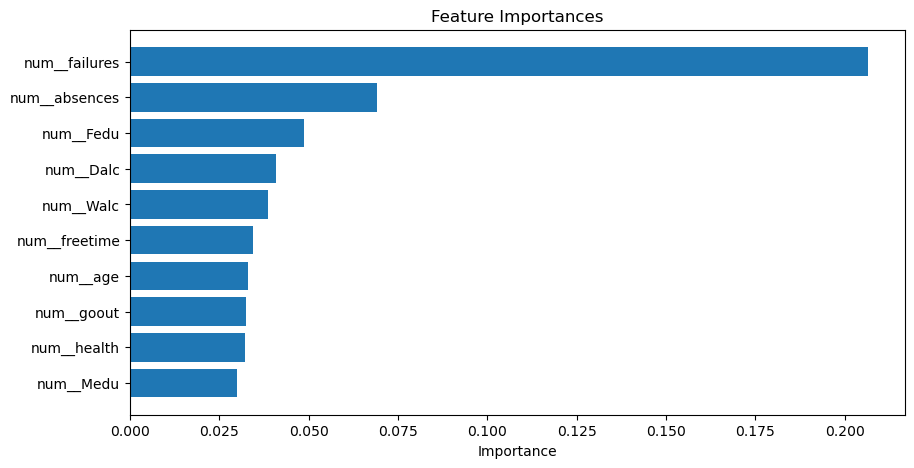

In [54]:
# Visualize the top 10 most important features
plt.figure(figsize=(10, 5))
plt.barh(importance_df['Feature'].head(10), importance_df['Importance'].head(10))  # Horizontal bar plot
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


***MENTION THAT THE MODEL IS OVERFITTED***